# THE SPARKS FOUNDATION 

### DATA SCIENCE AND BUSINESS ANALYTICS (GRIP JULY'21)

### # Task 1 

### Author: Vedant Mishra 

### Task Title: Prediction using Supervised ML 

### Problem Statement:Predict the percentage of a student based on the no. of study hours. 
 
Dataset provided: http://bit.ly/w-data

## Importing Libraries

In [1]:
# Importing all libraries required in this notebook

# Linear Algebra
import pandas as pd

# Data processing
import numpy as np  

# Data Visualization
import matplotlib.pyplot as plt  
%matplotlib inline

## Importing Dataset 

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"

# Creating the DataFrame 
data = pd.read_csv(url)

print("Data imported successfully")

# Viewing data
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Exploring the Data

In [3]:
#Viewing top 5 rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Summary of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Viewing Descriptive Statistic
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.shape

(25, 2)

In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
# Checking for Null Values 
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization 

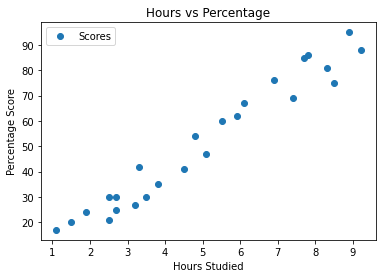

In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Correlation Analysis

In [11]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Hours,Scores
Hours,1.00,0.98
Scores,0.98,1.00


## **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
#Using train_test_split method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

The data has been splitted into training and testing data in 70-30 ratio. 70% of the data has been given for model building and the rest 30% for testing the model.

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
regressor.coef_
print("Training complete.")

Training complete.


In [15]:
print("Coeeficient:-", regressor.coef_)
print("Intercept:-", regressor.intercept_)

Coeeficient:- [9.91065648]
Intercept:- 2.018160041434683


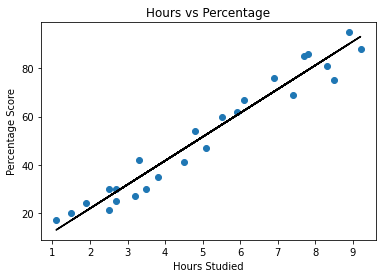

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)

plt.plot(X, line, color="black", label="Linear Refression Line");
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
# Testing data - In Hours
print(X_test) 

 # Predicting the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


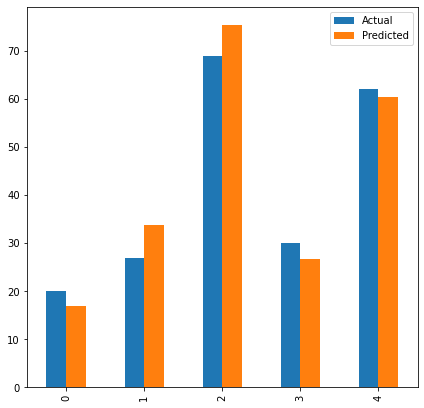

In [19]:
df.plot(kind = "bar" , figsize=(7,7))
plt.show()

In [20]:
#Training and testing with our own data
print("Testing Score:",regressor.score(X_train,y_train))
print("Training Score:",regressor.score(X_test,y_test))

Testing Score: 0.9515510725211552
Training Score: 0.9454906892105356


## Predicting the score if a student studies for 9.25 hrs/ day

In [21]:
# Testing with our own data
hours = 9.25
pred_score = regressor.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


**Hence our model shows that if a student studies for 9.25 hrs/day, the predicted score will be around 93.69.**

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [30]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [32]:
import sklearn 
from sklearn import metrics

In [33]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


*Mean Absolute Error is 4.1838, which is the mean of the absolute difference between the actual score and predicted score. 
*Mean squared error is the mean of square of the differences between the actual and predicted scores. Our MSE is 21.5987.
*Root Mean Squared error is the most efficient way to find out the average difference between the predicted score by the model and the actual score. RMSE is the square root of MSE, which is 4.6474 in our case. This means that our model's predictions has about 46 deviation from the actual price.

In [34]:
import statistics
SSE = sum((y_pred -  y_test)**2)
SST = sum((statistics.mean(y_pred)-y_test)**2)
R2=1-SSE/SST
R2

0.9456424677505609

This is the R square value. As we know higher the R square value, the better the model fits our data. In our case, R squared is 0.9456 which means that this model explains around 94% of the variance.

## Conclusion

Our prediction model using linear regression predicts the score of students by the hrs/day given, with a 95% accuracy and the Root Mean Squared error is about 4.6474. Therefore we can use this model to see how the no of hours put into studies per day can change the score of the students during exams.